In [1]:
import pickle
import torch.utils.data
import torch
from seagul.rl.run_utils import load_model, load_workspace
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd
from seagul.rl.models import PpoModel, switchedPpoModel
from seagul.nn import MLP
import gym
torch.set_default_dtype(torch.double)

/home/sgillen/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sgillen/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sgillen/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sgillen/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

Logging to /tmp/openai-2019-09-15-13-51-32-594808


In [5]:
seeds = [6,7,8,9]
#load_paths = ['./data/acrobot_switch4/r3_longer_seed_' + str(seed) for seed in seeds]
load_paths = ['./data/acrobot_switched4/baseline_ppo_cr' + str(seed) for seed in seeds]

avg_rewards = np.zeros((148,))
rewards = np.zeros((148,4))

for i, load_path in enumerate(load_paths):
    data = pd.read_csv(load_path + '/progress.csv')
    #avg_rewards  += data['eprewmean']
    rewards[:,i] = data['eprewmean']

    #model, env, args, ws = load_workspace(load_path)
    
    #avg_rewards += np.array((ws['avg_reward_hist']))
    #rewards[:,i] = np.array((ws['avg_reward_hist']))
    #append(ws['avg_reward_hist'])
    #plt.title('reward vs epoch')
    #plt.figure()
    #plt.plot(ws['a'])
    #plt.figure()
    #plt.plot(ws['p_loss_hist'])
    #plt.figure()
    #plt.plot(ws['v_loss_hist'])
    #print(ws['num_states'])
    
avg_rewards /= 4
min_rewards = [np.min(rewards[i,:]) for i in range(1000)]
max_rewards = [np.max(rewards[i,:]) for i in range(1000)]
plt.plot(avg_rewards)
plt.plot(min_rewards)
plt.plot(max_rewards)

rewards_smoothed = pd.Series(avg_rewards).rolling(10, min_periods=10).mean()
min_smoothed =  pd.Series(min_rewards).rolling(10, min_periods=10).mean()
max_smoothed =  pd.Series(max_rewards).rolling(10, min_periods=10).mean()

plt.figure()
plt.plot(rewards_smoothed)
plt.plot(min_smoothed)
plt.plot(max_smoothed)

plt.figure()

epochs = [t for t in range(1000)]
plt.plot(rewards_smoothed, color='k')
plt.fill_between(epochs, min_smoothed, max_smoothed, color='k',alpha=.2 )
plt.xlabel('Epoch')
plt.ylabel('Smoothed average rewards')
plt.title('Reward curve vanilla PPO')

#plt.figure()
#plt.plot(np.array(ws['ep_path_tensor']))

ValueError: could not broadcast input array from shape (147) into shape (148)

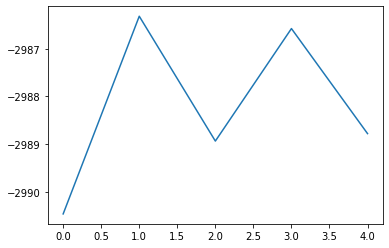

In [5]:
seeds = [6,7]

load_paths = ['./data/acrobot_switched4/baseline_ppo_long_al' + str(seed) for seed in seeds]

ri = 0

data = pd.read_csv(load_paths[ri] + '/progress.csv')
plt.plot(data['eprewmean'])
#model, env = load_model(ri)
